Trabajo realizado por Felipe Ramírez Vargas
Para ejecutar el notebook debe cargar todas las bases de datos en formato csv que se encuentran en el github

### Librerías


In [1]:
import os
import re
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *


#Analítica descriptiva

In [2]:
df1=pd.read_csv("MNCAATourneyCompactResults.csv")

In [3]:
df1.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   2384 non-null   int64 
 1   DayNum   2384 non-null   int64 
 2   WTeamID  2384 non-null   int64 
 3   WScore   2384 non-null   int64 
 4   LTeamID  2384 non-null   int64 
 5   LScore   2384 non-null   int64 
 6   WLoc     2384 non-null   object
 7   NumOT    2384 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 149.1+ KB


In [5]:
df1[["WScore","LScore"]].describe()

,WScore,LScore
count,2384.000000,2384.000000
mean,76.833893,65.104446
std,11.813884,11.058517
min,43.000000,29.000000
25%,69.000000,58.000000
50%,76.000000,64.000000
75%,84.000000,72.000000
max,149.000000,115.000000


In [6]:
df2=pd.read_csv("MNCAATourneySeeds.csv")

In [7]:
df2.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [8]:
df2["Season"].min()

1985

In [9]:
df2["Season"].max()

2023

In [10]:
df3=pd.read_csv("MRegularSeasonCompactResults.csv")

In [11]:
dfsub=pd.read_csv("SampleSubmission2023.csv")
dfsub

,ID,Pred
0,2023_1101_1102,0.5
1,2023_1101_1103,0.5
2,2023_1101_1104,0.5
3,2023_1101_1105,0.5
4,2023_1101_1106,0.5
...,...,...
130678,2023_3474_3476,0.5
130679,2023_3474_3477,0.5
130680,2023_3475_3476,0.5
130681,2023_3475_3477,0.5


In [12]:
df3.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [13]:
grup1= df3.groupby(['Season', 'WTeamID']).mean()
grup2= df3.groupby(['Season', 'LTeamID']).mean()



<ipython-input-13-6051a1064ccc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grup1= df3.groupby(['Season', 'WTeamID']).mean()
<ipython-input-13-6051a1064ccc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grup2= df3.groupby(['Season', 'LTeamID']).mean()


In [14]:
grup1[["WScore","LScore"]]

WScore     LScore
Season WTeamID                      
1985   1102     71.000000  61.000000
       1103     70.222222  62.666667
       1104     72.095238  58.904762
       1106     75.100000  65.600000
       1108     85.842105  72.000000
...                   ...        ...
2023   1473     83.250000  75.250000
       1474     79.266667  72.000000
       1475     80.384615  70.769231
       1476     70.769231  64.076923
       1477     72.000000  66.750000

[12645 rows x 2 columns]

In [15]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181682 entries, 0 to 181681
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   181682 non-null  int64 
 1   DayNum   181682 non-null  int64 
 2   WTeamID  181682 non-null  int64 
 3   WScore   181682 non-null  int64 
 4   LTeamID  181682 non-null  int64 
 5   LScore   181682 non-null  int64 
 6   WLoc     181682 non-null  object
 7   NumOT    181682 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 11.1+ MB


In [16]:
df3.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [17]:
df3[["WScore","LScore"]].describe()

,WScore,LScore
count,181682.000000,181682.000000
mean,76.746128,64.671569
std,11.897763,11.236768
min,34.000000,20.000000
25%,69.000000,57.000000
50%,76.000000,64.000000
75%,84.000000,72.000000
max,186.000000,150.000000


Se genera un dataframe que concatene las bases de datos "seed" de las mujeres y los hombres. Los seed basicamente es una nomenclatura que identifica la región del equipo

In [18]:
df_seeds = pd.concat([
    pd.read_csv("MNCAATourneySeeds.csv"),
    pd.read_csv("WNCAATourneySeeds.csv"),
], ignore_index=True)

df_seeds.tail(30)

,Season,Seed,TeamID
4068,2023,Y05,3450
4069,2023,Y06,3276
4070,2023,Y07,3301
4071,2023,Y08,3329
4072,2023,Y09,3274
4073,2023,Y10,3343
4074,2023,Y11,3424
4075,2023,Y12,3195
4076,2023,Y13,3156
4077,2023,Y14,3218


In [19]:
df_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4098 entries, 0 to 4097
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  4098 non-null   int64 
 1   Seed    4098 non-null   object
 2   TeamID  4098 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 96.2+ KB


In [20]:
df_seeds.isnull().count()

Season    4098
Seed      4098
TeamID    4098
dtype: int64

A continuación se concatenan los resultados tanto para hombres como para mujeres de las temporadas y se exluyen los valores NumOT y WLoc toda vez que no son útiles para el análisis. De manera paralela lo que se busca es identificar, cuales son las temporadas que se han jugado y adicionalmente los puntajes que se han obtenido tanto para los eventos femeninos como para los masculinos

In [21]:
df_season_results = pd.concat([
    pd.read_csv("MRegularSeasonCompactResults.csv"),
    pd.read_csv("WRegularSeasonCompactResults.csv"),
], ignore_index=True)

df_season_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,1985,20,1228,81,1328,64
1,1985,25,1106,77,1354,70
2,1985,25,1112,63,1223,56
3,1985,25,1165,70,1432,54
4,1985,25,1192,86,1447,74


In [22]:
df_season_results.tail()


,Season,DayNum,WTeamID,WScore,LTeamID,LScore
307850,2023,132,3179,89,3125,71
307851,2023,132,3221,66,3131,61
307852,2023,132,3235,61,3400,51
307853,2023,132,3284,80,3406,55
307854,2023,132,3357,72,3192,60


In [23]:
df_season_results["Season"]

0         1985
1         1985
2         1985
3         1985
4         1985
          ... 
307850    2023
307851    2023
307852    2023
307853    2023
307854    2023
Name: Season, Length: 307855, dtype: int64

Como se puede observar se han disputado 307851 eventos deportivos desde 1985 hasta el 2023.

In [24]:
df_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307855 entries, 0 to 307854
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Season   307855 non-null  int64
 1   DayNum   307855 non-null  int64
 2   WTeamID  307855 non-null  int64
 3   WScore   307855 non-null  int64
 4   LTeamID  307855 non-null  int64
 5   LScore   307855 non-null  int64
dtypes: int64(6)
memory usage: 14.1 MB


In [25]:
df_season_results.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
count,307855.000000,307855.000000,307855.000000,307855.000000,307855.000000,307855.000000
mean,2007.565016,73.131594,2105.995917,74.739241,2103.407003,61.740881
std,10.118320,34.481003,987.829906,11.917605,990.160767,11.607099
min,1985.000000,0.000000,1101.000000,30.000000,1101.000000,11.000000
25%,2000.000000,43.000000,1261.000000,66.000000,1254.000000,54.000000
50%,2009.000000,75.000000,1413.000000,74.000000,1408.000000,61.000000
75%,2016.000000,103.000000,3245.000000,82.000000,3245.000000,69.000000
max,2023.000000,132.000000,3477.000000,186.000000,3477.000000,150.000000


Al generar una descripción estadística preliminar de la base de datos se puede percibir que, según la media, los equipos deportivos ganan en promedio con 74,73 puntos y pierden en promedio con 61 puntos. Esta medida a la hora de generar una apuesta, podría ser beneficiosa en cuanto a establecer que los equipos deportivos cuando ganan,normalmente ganan por 75 puntos.

Una medida super importante para hacer el análisis es delimitar cual es la diferencia que existe entre el puntaje del equipo ganador Wscore y el perdedor Lscore, el cuál será siempre un valor positivo. Se hará esta verificación.

In [26]:
df_season_results['Diferencia Puntaje'] = df_season_results['WScore'] - df_season_results['LScore']
df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Diferencia Puntaje
0,1985,20,1228,81,1328,64,17
1,1985,25,1106,77,1354,70,7
2,1985,25,1112,63,1223,56,7
3,1985,25,1165,70,1432,54,16
4,1985,25,1192,86,1447,74,12


In [27]:
print(df_season_results[df_season_results['LScore']>0].count())

Season                307855
DayNum                307855
WTeamID               307855
WScore                307855
LTeamID               307855
LScore                307855
Diferencia Puntaje    307855
dtype: int64


Como se puede percibir a continuación nuestra teoría es válida y no hay datos erroneos para el análisis. No existe una diferencia de puntaje W-L negativa

In [28]:
df_season_results[df_season_results['Diferencia Puntaje']<0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Diferencia Puntaje


Analizamos el data frame si contiene datos nulos, como se puede percibir a continuación no hay presencia de los mismos. Todas las variables tienen 307855 datos.

In [29]:
df_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307855 entries, 0 to 307854
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Season              307855 non-null  int64
 1   DayNum              307855 non-null  int64
 2   WTeamID             307855 non-null  int64
 3   WScore              307855 non-null  int64
 4   LTeamID             307855 non-null  int64
 5   LScore              307855 non-null  int64
 6   Diferencia Puntaje  307855 non-null  int64
dtypes: int64(7)
memory usage: 16.4 MB


Adicionalmente, se genera un diagrama de bigotes para percibir la distribución de la data a lo largo de las temporadas.  

In [30]:
print(df_season_results.columns)

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore',
       'Diferencia Puntaje'],
      dtype='object')


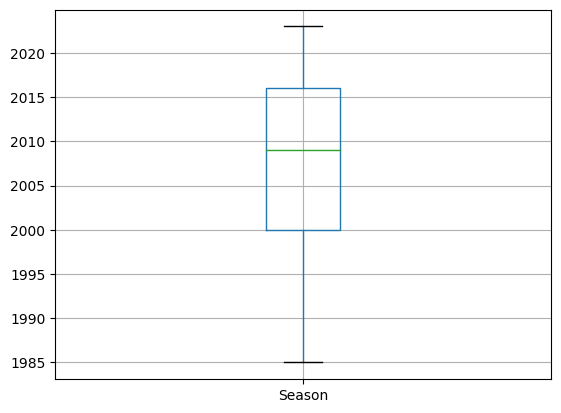

In [31]:
dfbigotes = df_season_results.boxplot(column=['Season'])
dfbigotes.plot()

plt.show()

Como se puede percibir la data se condensa fuertemente desde el año 2000


In [32]:
df_season_results[df_season_results["Season"]<2000]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Diferencia Puntaje
0,1985,20,1228,81,1328,64,17
1,1985,25,1106,77,1354,70,7
2,1985,25,1112,63,1223,56,7
3,1985,25,1165,70,1432,54,16
4,1985,25,1192,86,1447,74,12
...,...,...,...,...,...,...,...
189776,1999,131,3403,73,3235,59,14
189777,1999,131,3416,80,3240,59,21
189778,1999,131,3417,85,3112,77,8
189779,1999,131,3449,72,3450,70,2


A continuación se genera mediante la función groupby un agrupamiento teniendo en cuenta la condición W=win (ganar) y L=lose (perder), así se podrán diferenciar el equipo ganador y perdedor,adicionalmente, se podrá consolidar por temporada. Análogamente, se podrá determinar la media de la diferencia de puntajes cuando se gana y pierde

In [33]:
Partidas_ganadas = df_season_results.groupby(['Season', 'WTeamID']).count()
Partidas_ganadas = Partidas_ganadas.reset_index()[['Season', 'WTeamID', 'DayNum']].rename(columns={"DayNum": "Partidas Ganadas", "WTeamID": "TeamID"})

Se agrupa por temporada y equipo ganador

In [34]:
Partidas_ganadas

,Season,TeamID,Partidas Ganadas
0,1985,1102,5
1,1985,1103,9
2,1985,1104,21
3,1985,1106,10
4,1985,1108,19
...,...,...,...
21377,2023,3473,1
21378,2023,3474,5
21379,2023,3475,9
21380,2023,3476,8


In [35]:
Partidas_ganadas[Partidas_ganadas["Season"]<2000]

,Season,TeamID,Partidas Ganadas
0,1985,1102,5
1,1985,1103,9
2,1985,1104,21
3,1985,1106,10
4,1985,1108,19
...,...,...,...
5045,1999,3460,7
5046,1999,3461,6
5047,1999,3462,23
5048,1999,3463,10


In [36]:
Partidas_perdidas = df_season_results.groupby(['Season', 'LTeamID']).count()
Partidas_perdidas = Partidas_perdidas.reset_index()[['Season', 'LTeamID', 'DayNum']].rename(columns={"DayNum": "Partidas Perdidas", "LTeamID": "TeamID"})

In [37]:
Partidas_perdidas

,Season,TeamID,Partidas Perdidas
0,1985,1102,19
1,1985,1103,14
2,1985,1104,9
3,1985,1106,14
4,1985,1108,6
...,...,...,...
21404,2023,3473,24
21405,2023,3474,21
21406,2023,3475,17
21407,2023,3476,20


In [38]:
Difgan = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
Difgan = Difgan[['Season', 'WTeamID', 'Diferencia Puntaje']].rename(columns={"Diferencia Puntaje": "Media Diferencia Puntaje Partidas ganadas", "WTeamID": "TeamID"})

In [39]:
Difgan

,Season,TeamID,Media Diferencia Puntaje Partidas ganadas
0,1985,1102,10.000000
1,1985,1103,7.555556
2,1985,1104,13.190476
3,1985,1106,9.500000
4,1985,1108,13.842105
...,...,...,...
21377,2023,3473,9.000000
21378,2023,3474,10.200000
21379,2023,3475,13.000000
21380,2023,3476,10.125000


In [40]:
Difper = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
Difper = Difper[['Season', 'LTeamID', 'Diferencia Puntaje']].rename(columns={"Diferencia Puntaje": "Media Diferencia Puntaje perdidas", "LTeamID": "TeamID"})

In [41]:
Difper

,Season,TeamID,Media Diferencia Puntaje perdidas
0,1985,1102,9.947368
1,1985,1103,9.857143
2,1985,1104,4.777778
3,1985,1106,13.285714
4,1985,1108,10.666667
...,...,...,...
21404,2023,3473,18.500000
21405,2023,3474,20.523810
21406,2023,3475,12.176471
21407,2023,3476,12.800000


In [42]:
df_features_season_ganadores = df_season_results.groupby(['Season', 'WTeamID']).count().reset_index()[['Season', 'WTeamID']].rename(columns={"WTeamID": "TeamID"})
df_features_season_perdedores = df_season_results.groupby(['Season', 'LTeamID']).count().reset_index()[['Season', 'LTeamID']].rename(columns={"LTeamID": "TeamID"})

In [43]:
df_features_season_ganadores

,Season,TeamID
0,1985,1102
1,1985,1103
2,1985,1104
3,1985,1106
4,1985,1108
...,...,...
21377,2023,3473
21378,2023,3474
21379,2023,3475
21380,2023,3476


In [44]:
df_features_season_perdedores

,Season,TeamID
0,1985,1102
1,1985,1103
2,1985,1104
3,1985,1106
4,1985,1108
...,...,...
21404,2023,3473
21405,2023,3474
21406,2023,3475
21407,2023,3476


In [45]:
df_features_season = pd.concat([df_features_season_ganadores, df_features_season_perdedores], axis=0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)

In [46]:
df_features_season

,Season,TeamID
0,1985,1102
1,1985,1103
2,1985,1104
3,1985,1106
4,1985,1108
...,...,...
21423,2023,3473
21424,2023,3474
21425,2023,3475
21426,2023,3476


In [47]:
df_features_season = df_features_season.merge(Partidas_ganadas, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(Partidas_perdidas, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(Difgan, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(Difper, on=['Season', 'TeamID'], how='left')

In [48]:
df_features_season

,Season,TeamID,Partidas Ganadas,Partidas Perdidas,Media Diferencia Puntaje Partidas ganadas,Media Diferencia Puntaje perdidas
0,1985,1102,5.0,19.0,10.000000,9.947368
1,1985,1103,9.0,14.0,7.555556,9.857143
2,1985,1104,21.0,9.0,13.190476,4.777778
3,1985,1106,10.0,14.0,9.500000,13.285714
4,1985,1108,19.0,6.0,13.842105,10.666667
...,...,...,...,...,...,...
21423,2023,3473,1.0,24.0,9.000000,18.500000
21424,2023,3474,5.0,21.0,10.200000,20.523810
21425,2023,3475,9.0,17.0,13.000000,12.176471
21426,2023,3476,8.0,20.0,10.125000,12.800000


In [49]:
df_features_season[df_features_season["Season"]==1987]



,Season,TeamID,Partidas Ganadas,Partidas Perdidas,Media Diferencia Puntaje Partidas ganadas,Media Diferencia Puntaje perdidas
565,1987,1102,8.0,15.0,11.750000,12.533333
566,1987,1103,18.0,8.0,12.722222,6.750000
567,1987,1104,26.0,4.0,13.230769,5.250000
568,1987,1106,12.0,13.0,9.416667,10.076923
569,1987,1108,5.0,20.0,6.200000,13.000000
...,...,...,...,...,...,...
850,1987,1458,11.0,17.0,10.181818,12.000000
851,1987,1461,21.0,9.0,9.285714,3.777778
852,1987,1462,14.0,12.0,10.357143,7.250000
853,1987,1463,13.0,12.0,8.153846,8.166667


In [50]:
df_features_season.fillna(0, inplace=True)

In [51]:
df_features_season

,Season,TeamID,Partidas Ganadas,Partidas Perdidas,Media Diferencia Puntaje Partidas ganadas,Media Diferencia Puntaje perdidas
0,1985,1102,5.0,19.0,10.000000,9.947368
1,1985,1103,9.0,14.0,7.555556,9.857143
2,1985,1104,21.0,9.0,13.190476,4.777778
3,1985,1106,10.0,14.0,9.500000,13.285714
4,1985,1108,19.0,6.0,13.842105,10.666667
...,...,...,...,...,...,...
21423,2023,3473,1.0,24.0,9.000000,18.500000
21424,2023,3474,5.0,21.0,10.200000,20.523810
21425,2023,3475,9.0,17.0,13.000000,12.176471
21426,2023,3476,8.0,20.0,10.125000,12.800000


Así a su vez, en primera instancia se podría pensar en que, teniendo el puntaje de los partidos jugados por cada equipo, se podría analizar la media de la diferencia de los partidos cuando se gana y cuando se pierde, esto genera una variable de importancia para cada equipo. A continuación se realiza un ejemplo en aras de demostrar la relevancia de este dato.

Media diferencia Equipo A Gana = 12 puntos
Media diferencia Equipo B Gana = 7 puntos
Media diferencia Equipo A Pierde =2 puntos
Media diferencia Equipo B Pierde = 5 puntos

De esta manera en un enfrentamiento entre el equipo A y el B, el equipo A ganaría en principio toda vez que, normalmente cuando gana hace más puntos que el equipo B y cuando pierde recibe menos puntos que este.


In [52]:
df_features_season.head()

,Season,TeamID,Partidas Ganadas,Partidas Perdidas,Media Diferencia Puntaje Partidas ganadas,Media Diferencia Puntaje perdidas
0,1985,1102,5.0,19.0,10.000000,9.947368
1,1985,1103,9.0,14.0,7.555556,9.857143
2,1985,1104,21.0,9.0,13.190476,4.777778
3,1985,1106,10.0,14.0,9.500000,13.285714
4,1985,1108,19.0,6.0,13.842105,10.666667


La suma de las partidas ganadas debe ser igual a la suma de las partidas pérdidas.

In [53]:
if(df_features_season["Partidas Perdidas"].sum()==df_features_season["Partidas Ganadas"].sum()):
  print("Está bueno")

Está bueno


#Promedio de la diferencia

In [54]:
df_features_season['Proporcion_ganadas'] = df_features_season['Partidas Ganadas'] / (df_features_season['Partidas Ganadas'] + df_features_season['Partidas Perdidas'])
df_features_season['Promedio diferencia'] = (
    (df_features_season['Partidas Ganadas'] * df_features_season['Media Diferencia Puntaje Partidas ganadas'] -
    df_features_season['Partidas Perdidas'] * df_features_season['Media Diferencia Puntaje perdidas'])
    / (df_features_season['Partidas Ganadas'] + df_features_season['Partidas Perdidas'])
)

In [55]:
df_features_season

,Season,TeamID,Partidas Ganadas,Partidas Perdidas,Media Diferencia Puntaje Partidas ganadas,Media Diferencia Puntaje perdidas,Proporcion_ganadas,Promedio diferencia
0,1985,1102,5.0,19.0,10.000000,9.947368,0.208333,-5.791667
1,1985,1103,9.0,14.0,7.555556,9.857143,0.391304,-3.043478
2,1985,1104,21.0,9.0,13.190476,4.777778,0.700000,7.800000
3,1985,1106,10.0,14.0,9.500000,13.285714,0.416667,-3.791667
4,1985,1108,19.0,6.0,13.842105,10.666667,0.760000,7.960000
...,...,...,...,...,...,...,...,...
21423,2023,3473,1.0,24.0,9.000000,18.500000,0.040000,-17.400000
21424,2023,3474,5.0,21.0,10.200000,20.523810,0.192308,-14.615385
21425,2023,3475,9.0,17.0,13.000000,12.176471,0.346154,-3.461538
21426,2023,3476,8.0,20.0,10.125000,12.800000,0.285714,-6.250000


In [56]:

grafico = df_features_season.groupby(["TeamID"])["Promedio diferencia"].mean()

In [57]:
grafico2 = grafico
grafico2.sort_values(ascending=False, inplace=True)
grafico2=grafico2.reset_index(drop=False, inplace=False)

In [58]:
grafico2

,TeamID,Promedio diferencia
0,3163,29.182923
1,3124,17.776276
2,3195,15.934519
3,3181,15.920897
4,3390,15.743799
...,...,...
738,1118,-16.814815
739,3473,-17.400000
740,1289,-19.791667
741,3147,-21.335884


Se analiza el equipo 3163 toda vez que, entrega el promedio de la diferencia mayor por ende, en teoría es el mejor.

In [59]:
df_features_season[(df_features_season["TeamID"]==3163)].head(15)

,Season,TeamID,Partidas Ganadas,Partidas Perdidas,Media Diferencia Puntaje Partidas ganadas,Media Diferencia Puntaje perdidas,Proporcion_ganadas,Promedio diferencia
4186,1998,3163,30.0,2.0,27.166667,9.500000,0.937500,24.875000
4798,1999,3163,27.0,4.0,37.185185,10.500000,0.870968,31.032258
5428,2000,3163,30.0,1.0,31.500000,1.000000,0.967742,30.451613
6061,2001,3163,28.0,2.0,35.678571,10.000000,0.933333,32.633333
6700,2002,3163,33.0,0.0,37.000000,0.000000,1.000000,37.000000
7350,2003,3163,31.0,1.0,23.032258,4.000000,0.968750,22.187500
7999,2004,3163,25.0,4.0,27.000000,5.500000,0.862069,22.517241
8653,2005,3163,23.0,7.0,27.913043,8.142857,0.766667,19.500000
9315,2006,3163,29.0,4.0,21.724138,10.500000,0.878788,17.818182
9984,2007,3163,29.0,3.0,26.103448,6.666667,0.906250,23.031250


Para que sea más sencillo de trabajar solo se dejarán como medidas relevantes, proporción ganadas y promedio diferencia.


In [60]:
df_features_season.drop(['Partidas Ganadas', 'Partidas Perdidas', 'Media Diferencia Puntaje Partidas ganadas', 'Media Diferencia Puntaje perdidas'], axis=1, inplace=True)

In [61]:
df_torneo_resultados = pd.concat([
    pd.read_csv("WNCAATourneyCompactResults.csv"),
    pd.read_csv("MNCAATourneyCompactResults.csv"),
], ignore_index=True)
df_torneo_resultados.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

Es importante este apartado del código, dado que se podría tener en cuenta toda la data, o desde un año en específico, por relevancia, se podrían tomar los datos desde el 2015 los cuales son los mas recientes y que se ajustan al comportamiento esperado.

Temp

In [62]:
dftor = df_torneo_resultados.copy()
dftor = dftor[dftor["Season"]>1998].reset_index(drop=True)

dftor.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,1999,137,3104,80,3212,68
1,1999,137,3112,87,3196,84
2,1999,137,3155,76,3197,45
3,1999,137,3161,71,3169,59
4,1999,137,3163,97,3384,46


In [63]:
dftor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Season   2955 non-null   int64
 1   DayNum   2955 non-null   int64
 2   WTeamID  2955 non-null   int64
 3   WScore   2955 non-null   int64
 4   LTeamID  2955 non-null   int64
 5   LScore   2955 non-null   int64
dtypes: int64(6)
memory usage: 138.6 KB


In [64]:
dftor = pd.merge(
    dftor,
    df_seeds,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedW'})

In [65]:
dftor = pd.merge(
    dftor,
    df_seeds,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedL'})

In [66]:
dftor.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL
0,1999,137,3104,80,3212,68,Y05,Y12
1,1999,137,3112,87,3196,84,Y06,Y11
2,1999,137,3155,76,3197,45,X02,X15
3,1999,137,3161,71,3169,59,Z02,Z15
4,1999,137,3163,97,3384,46,X01,X16


A la semilla se le quitará la zona es decir "Z,W,etc" para un mejor tratamiento

In [67]:
def borrar_semilla(seed):
    return int(re.sub("[^0-9]", "", seed))

In [68]:
dftor['SeedW'] = dftor['SeedW'].apply(borrar_semilla)
dftor['SeedL'] = dftor['SeedL'].apply(borrar_semilla)

In [69]:
dftor.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL
0,1999,137,3104,80,3212,68,5,12
1,1999,137,3112,87,3196,84,6,11
2,1999,137,3155,76,3197,45,2,15
3,1999,137,3161,71,3169,59,2,15
4,1999,137,3163,97,3384,46,1,16


A continuación lo que se genera es que se consolidan las bases de datos y se disgrega tanto para el equipo ganador como para el perdedor la Medida de la diferencia del puntaje y la proporción de ganadas

In [70]:
dftor = pd.merge(
    dftor,
    df_features_season,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'Partidas Ganadas': 'Partidas GanadasW',
    'Partidas Perdidas': 'Partidas PerdidasW',
    'Media Diferencia Puntaje Partidas ganadas': 'Media Diferencia Puntaje Partidas ganadasW',
    'Media Diferencia Puntaje perdidas': 'Media Diferencia Puntaje perdidasW',
    'Proporcion_ganadas': 'Proporcion_ganadasW',
    'Promedio diferencia': 'Promedio diferenciaW',
}).drop(columns='TeamID', axis=1)

In [71]:
dftor = pd.merge(
    dftor,
    df_features_season,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'Partidas Ganadas': 'Partidas GanadasL',
    'Partidas Perdidas': 'Partidas PerdidasL',
    'Media Diferencia Puntaje Partidas ganadas': 'Media Diferencia Puntaje Partidas ganadasL',
    'Media Diferencia Puntaje perdidas': 'Media Diferencia Puntaje perdidasL',
    'Proporcion_ganadas': 'Proporcion_ganadasL',
    'Promedio diferencia': 'Promedio diferenciaL',
}).drop(columns='TeamID', axis=1)

In [72]:
dftor.head(130)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL,Proporcion_ganadasW,Promedio diferenciaW,Proporcion_ganadasL,Promedio diferenciaL
0,1999,137,3104,80,3212,68,5,12,0.655172,10.551724,0.857143,17.071429
1,1999,137,3112,87,3196,84,6,11,0.629630,4.481481,0.593750,4.968750
2,1999,137,3155,76,3197,45,2,15,0.827586,14.931034,0.620690,4.413793
3,1999,137,3161,71,3169,59,2,15,0.939394,17.818182,0.750000,9.642857
4,1999,137,3163,97,3384,46,1,16,0.870968,31.032258,0.620690,2.344828
...,...,...,...,...,...,...,...,...,...,...,...,...
125,2000,153,3163,71,3397,52,1,1,0.967742,30.451613,0.903226,16.967742
126,2001,137,3155,51,3151,49,5,12,0.689655,7.137931,0.800000,13.366667
127,2001,137,3196,84,3221,52,3,14,0.821429,15.392857,0.724138,3.896552
128,2001,137,3199,72,3408,70,7,10,0.620690,5.793103,0.709677,8.129032


In [73]:
def partidosperdidos(dftor):
    win_rename = {
        "WTeamID": "TeamIdA",
        "WScore" : "ScoreA",
        "LTeamID" : "TeamIdB",
        "LScore": "ScoreB",
     }
    win_rename.update({c : c[:-1] + "A" for c in dftor.columns if c.endswith('W')})
    win_rename.update({c : c[:-1] + "B" for c in dftor.columns if c.endswith('L')})

    lose_rename = {
        "WTeamID": "TeamIdB",
        "WScore" : "ScoreB",
        "LTeamID" : "TeamIdA",
        "LScore": "ScoreA",
    }
    lose_rename.update({c : c[:-1] + "B" for c in dftor.columns if c.endswith('W')})
    lose_rename.update({c : c[:-1] + "A" for c in dftor.columns if c.endswith('L')})

    win_df = dftor.copy()
    lose_df = dftor.copy()

    win_df = win_df.rename(columns=win_rename)
    lose_df = lose_df.rename(columns=lose_rename)

    return pd.concat([win_df, lose_df], axis=0, sort=False)

In [74]:
dftor = partidosperdidos(dftor)

In [75]:
dftor.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB
0,1999,137,3104,80,3212,68,5,12,0.655172,10.551724,0.857143,17.071429
1,1999,137,3112,87,3196,84,6,11,0.629630,4.481481,0.593750,4.968750
2,1999,137,3155,76,3197,45,2,15,0.827586,14.931034,0.620690,4.413793
3,1999,137,3161,71,3169,59,2,15,0.939394,17.818182,0.750000,9.642857
4,1999,137,3163,97,3384,46,1,16,0.870968,31.032258,0.620690,2.344828


Se buscará generar una diferencia entre los promedios del equipo A y B, así de esta manera si genera un valor positivo significaría que existiría mayor probabilidad de ganar.


In [76]:
columnas_diferencia= ['Proporcion_ganadas', 'Promedio diferencia',]

for col in columnas_diferencia:
    dftor[col + 'Diff'] = dftor[col + 'A'] - dftor[col + 'B']

In [77]:
dftor.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff
0,1999,137,3104,80,3212,68,5,12,0.655172,10.551724,0.857143,17.071429,-0.201970,-6.519704
1,1999,137,3112,87,3196,84,6,11,0.629630,4.481481,0.593750,4.968750,0.035880,-0.487269
2,1999,137,3155,76,3197,45,2,15,0.827586,14.931034,0.620690,4.413793,0.206897,10.517241
3,1999,137,3161,71,3169,59,2,15,0.939394,17.818182,0.750000,9.642857,0.189394,8.175325
4,1999,137,3163,97,3384,46,1,16,0.870968,31.032258,0.620690,2.344828,0.250278,28.687430


In [78]:
dftor.tail()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff
2950,2022,146,1274,50,1242,76,10,1,0.696970,3.787879,0.823529,10.441176,-0.126560,-6.653298
2951,2022,146,1389,49,1314,69,15,8,0.620690,3.931034,0.727273,5.787879,-0.106583,-1.856844
2952,2022,152,1437,65,1242,81,2,1,0.787879,9.545455,0.823529,10.441176,-0.035651,-0.895722
2953,2022,152,1181,77,1314,81,2,8,0.823529,13.029412,0.727273,5.787879,0.096257,7.241533
2954,2022,154,1314,69,1242,72,8,1,0.727273,5.787879,0.823529,10.441176,-0.096257,-4.653298


Agregamos el data set, que nos proporciona la plataforma para la validación

In [79]:
df_test = pd.read_csv("SampleSubmission2023.csv")

In [80]:
df_test.head()

,ID,Pred
0,2023_1101_1102,0.5
1,2023_1101_1103,0.5
2,2023_1101_1104,0.5
3,2023_1101_1105,0.5
4,2023_1101_1106,0.5


In [81]:
df_test.tail()

,ID,Pred
130678,2023_3474_3476,0.5
130679,2023_3474_3477,0.5
130680,2023_3475_3476,0.5
130681,2023_3475_3477,0.5
130682,2023_3476_3477,0.5


In [82]:
df_test['Season'] = df_test['ID'].apply(lambda x: int(x.split('_')[0]))
df_test['TeamIdA'] = df_test['ID'].apply(lambda x: int(x.split('_')[1]))
df_test['TeamIdB'] = df_test['ID'].apply(lambda x: int(x.split('_')[2]))

In [83]:
df_test = pd.merge(
    df_test,
    df_seeds,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedA'}).fillna('W01')

In [84]:
df_test = pd.merge(
    df_test,
    df_seeds,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedB'}).fillna('W01')

In [85]:
df_test['SeedA'] = df_test['SeedA'].apply(borrar_semilla)
df_test['SeedB'] = df_test['SeedB'].apply(borrar_semilla)

In [86]:
df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'Partidas Ganadas': 'Partidas GanadasA',
    'Partidas Perdidas': 'Partidas PerdidasA',
    'Media Diferencia Puntaje Partidas ganadas': 'Media Diferencia Puntaje Partidas ganadasA',
    'Media Diferencia Puntaje perdidas': 'Media Diferencia Puntaje perdidasA',
    'Proporcion_ganadas': 'Proporcion_ganadasA',
    'Promedio diferencia': 'Promedio diferenciaA',
}).drop(columns='TeamID', axis=1)

In [87]:
df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'Partidas Ganadas': 'Partidas GanadasB',
    'Partidas Perdidas': 'Partidas PerdidasB',
    'Media Diferencia Puntaje Partidas ganadas': 'Media Diferencia Puntaje Partidas ganadasB',
    'Media Diferencia Puntaje perdidas': 'Media Diferencia Puntaje perdidasB',
    'Proporcion_ganadas': 'Proporcion_ganadasB',
    'Promedio diferencia': 'Promedio diferenciaB',
}).drop(columns='TeamID', axis=1)

In [88]:
df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB
0,2023_1101_1102,0.5,2023,1101,1102,1,1,0.346154,-3.692308,0.437500,-0.125000
1,2023_1101_1103,0.5,2023,1101,1103,1,1,0.346154,-3.692308,0.645161,5.838710
2,2023_1101_1104,0.5,2023,1101,1104,1,1,0.346154,-3.692308,0.852941,13.676471
3,2023_1101_1105,0.5,2023,1101,1105,1,1,0.346154,-3.692308,0.400000,-3.066667
4,2023_1101_1106,0.5,2023,1101,1106,1,1,0.346154,-3.692308,0.233333,-10.033333


In [89]:
for col in columnas_diferencia:
    df_test[col + 'Diff'] = df_test[col + 'A'] - df_test[col + 'B']

In [90]:
dftor['ScoreDiff'] = dftor['ScoreA'] - dftor['ScoreB']
dftor['WinA'] = (dftor['ScoreDiff'] > 0).astype(int)

In [91]:
dftor.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff,ScoreDiff,WinA
0,1999,137,3104,80,3212,68,5,12,0.655172,10.551724,0.857143,17.071429,-0.201970,-6.519704,12,1
1,1999,137,3112,87,3196,84,6,11,0.629630,4.481481,0.593750,4.968750,0.035880,-0.487269,3,1
2,1999,137,3155,76,3197,45,2,15,0.827586,14.931034,0.620690,4.413793,0.206897,10.517241,31,1
3,1999,137,3161,71,3169,59,2,15,0.939394,17.818182,0.750000,9.642857,0.189394,8.175325,12,1
4,1999,137,3163,97,3384,46,1,16,0.870968,31.032258,0.620690,2.344828,0.250278,28.687430,51,1


In [92]:
dftor.tail()


,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff,ScoreDiff,WinA
2950,2022,146,1274,50,1242,76,10,1,0.696970,3.787879,0.823529,10.441176,-0.126560,-6.653298,-26,0
2951,2022,146,1389,49,1314,69,15,8,0.620690,3.931034,0.727273,5.787879,-0.106583,-1.856844,-20,0
2952,2022,152,1437,65,1242,81,2,1,0.787879,9.545455,0.823529,10.441176,-0.035651,-0.895722,-16,0
2953,2022,152,1181,77,1314,81,2,8,0.823529,13.029412,0.727273,5.787879,0.096257,7.241533,-4,0
2954,2022,154,1314,69,1242,72,8,1,0.727273,5.787879,0.823529,10.441176,-0.096257,-4.653298,-3,0


In [93]:
dftor[dftor["WinA"]==0].count()

Season                     2955
DayNum                     2955
TeamIdA                    2955
ScoreA                     2955
TeamIdB                    2955
ScoreB                     2955
SeedA                      2955
SeedB                      2955
Proporcion_ganadasA        2955
Promedio diferenciaA       2955
Proporcion_ganadasB        2955
Promedio diferenciaB       2955
Proporcion_ganadasDiff     2955
Promedio diferenciaDiff    2955
ScoreDiff                  2955
WinA                       2955
dtype: int64

In [94]:
dftor

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff,ScoreDiff,WinA
0,1999,137,3104,80,3212,68,5,12,0.655172,10.551724,0.857143,17.071429,-0.201970,-6.519704,12,1
1,1999,137,3112,87,3196,84,6,11,0.629630,4.481481,0.593750,4.968750,0.035880,-0.487269,3,1
2,1999,137,3155,76,3197,45,2,15,0.827586,14.931034,0.620690,4.413793,0.206897,10.517241,31,1
3,1999,137,3161,71,3169,59,2,15,0.939394,17.818182,0.750000,9.642857,0.189394,8.175325,12,1
4,1999,137,3163,97,3384,46,1,16,0.870968,31.032258,0.620690,2.344828,0.250278,28.687430,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,2022,146,1274,50,1242,76,10,1,0.696970,3.787879,0.823529,10.441176,-0.126560,-6.653298,-26,0
2951,2022,146,1389,49,1314,69,15,8,0.620690,3.931034,0.727273,5.787879,-0.106583,-1.856844,-20,0
2952,2022,152,1437,65,1242,81,2,1,0.787879,9.545455,0.823529,10.441176,-0.035651,-0.895722,-16,0
2953,2022,152,1181,77,1314,81,2,8,0.823529,13.029412,0.727273,5.787879,0.096257,7.241533,-4,0


Las características serán las variables importantes para el modelo y que generarán la información para determinar si un equipo es mejor que otro.

In [95]:
caracteristica = [
    'Proporcion_ganadasA', 'Promedio diferenciaA', 'Proporcion_ganadasB', 'Promedio diferenciaB', 'Proporcion_ganadasDiff', 'Promedio diferenciaDiff'
]

In [96]:
def minmax(caracteristica, df_train, df_val, df_test=None):
    min_ = df_train[caracteristica].min()
    max_ = df_train[caracteristica].max()

    df_train[caracteristica] = (df_train[caracteristica] - min_) / (max_ - min_)
    df_val[caracteristica] = (df_val[caracteristica] - min_) / (max_ - min_)

    if df_test is not None:
        df_test[caracteristica] = (df_test[caracteristica] - min_) / (max_ - min_)

    return df_train, df_val, df_test

In [113]:
def kfold(dftor, df_test_=None, plot=False, verbose=0, mode="a"):
    seasons = dftor['Season'].unique()
    cvs = []
    cvs2 =[]
    pred_tests = []
    target = "ScoreDiff" if mode == "reg" else "WinA"

    for season in seasons[1:]:
        if verbose:
            print(f'\nValidating on season {season}')

        df_train = dftor[dftor['Season'] < season].reset_index(drop=True).copy()
        df_val = dftor[dftor['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()

        df_train, df_val, df_test = minmax(caracteristica, df_train, df_val, df_test)

        if mode == "reg":
            model = ElasticNet(alpha=1, l1_ratio=0.5)

        else:
            model = LogisticRegression(C=1)

        model.fit(df_train[caracteristica], df_train[target])

        if mode == "reg":
            pred = model.predict(df_val[caracteristica])
        else:
            pred = model.predict_proba(df_val[caracteristica])[:, 1]

        if df_test is not None:
            if mode == "reg":
                pred_test = model.predict(df_test[caracteristica])


                pred_test = (pred_test - pred_test.min()) / (pred_test.max() - pred_test.min())
            else:
                pred_test = model.predict_proba(df_test[caracteristica])[:, 1]

            pred_tests.append(pred_test)

        if plot:
            plt.figure(figsize=(15, 6))
            plt.subplot(1, 2, 1)
            plt.scatter(pred, df_val['ScoreDiff'].values, s=5)
            plt.title('Prediction vs Score Diff')
            plt.grid(True)
            plt.subplot(1, 2, 2)
            sns.histplot(pred, bins=20)
            plt.title('Predictions probability repartition')
            plt.show()

        pred = (pred - pred.min()) / (pred.max() - pred.min())
        pred = np.clip(pred, 0, 1)

        MSE = (((df_val['WinA'].values - pred))**2).mean()
        MAE =np.abs(((df_val['WinA'].values - pred))).mean()
        cvs.append(MSE)
        cvs2.append(MAE)



        if verbose:
            print(f'\t -> MSE {MSE:.3f}')
            #print(f'\t -> MAE {MAE:.3f}')



    print(f'\n Local MSE is {np.mean(cvs):.3f}')
   # print(f'\n Local MAE is {np.mean(cvs2):.3f}')


    return pred_tests

In [114]:
pred_tests = kfold(dftor, df_test, plot=False, verbose=1, mode="log")


Validating on season 2000
	 -> MSE 0.206

Validating on season 2001
	 -> MSE 0.194

Validating on season 2002
	 -> MSE 0.200

Validating on season 2003
	 -> MSE 0.191

Validating on season 2004
	 -> MSE 0.198

Validating on season 2005
	 -> MSE 0.186

Validating on season 2006
	 -> MSE 0.178

Validating on season 2007
	 -> MSE 0.187

Validating on season 2008
	 -> MSE 0.169

Validating on season 2009
	 -> MSE 0.193

Validating on season 2010
	 -> MSE 0.198

Validating on season 2011
	 -> MSE 0.206

Validating on season 2012
	 -> MSE 0.200

Validating on season 2013
	 -> MSE 0.213

Validating on season 2014
	 -> MSE 0.199

Validating on season 2015
	 -> MSE 0.184

Validating on season 2016
	 -> MSE 0.207

Validating on season 2017
	 -> MSE 0.203

Validating on season 2018
	 -> MSE 0.215

Validating on season 2019
	 -> MSE 0.195

Validating on season 2021
	 -> MSE 0.220

Validating on season 2022
	 -> MSE 0.219

 Local MSE is 0.198


In [115]:
final_sub = df_test[['ID', "Pred"]].copy()
final_sub.to_csv('submission.csv', index=False)

In [116]:
df_test

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff,pred
0,2023_1101_1102,0.5,2023,1101,1102,1,1,0.346154,-3.692308,0.437500,-0.125000,-0.091346,-3.567308,0.377654
1,2023_1101_1103,0.5,2023,1101,1103,1,1,0.346154,-3.692308,0.645161,5.838710,-0.299007,-9.531017,0.206033
2,2023_1101_1104,0.5,2023,1101,1104,1,1,0.346154,-3.692308,0.852941,13.676471,-0.506787,-17.368778,0.080283
3,2023_1101_1105,0.5,2023,1101,1105,1,1,0.346154,-3.692308,0.400000,-3.066667,-0.053846,-0.625641,0.475150
4,2023_1101_1106,0.5,2023,1101,1106,1,1,0.346154,-3.692308,0.233333,-10.033333,0.112821,6.341026,0.705072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130678,2023_3474_3476,0.5,2023,3474,3476,1,1,0.192308,-14.615385,0.285714,-6.250000,-0.093407,-8.365385,0.243988
130679,2023_3474_3477,0.5,2023,3474,3477,1,1,0.192308,-14.615385,0.406250,-5.000000,-0.213942,-9.615385,0.208522
130680,2023_3475_3476,0.5,2023,3475,3476,1,1,0.346154,-3.461538,0.285714,-6.250000,0.060440,2.788462,0.595555
130681,2023_3475_3477,0.5,2023,3475,3477,1,1,0.346154,-3.461538,0.406250,-5.000000,-0.060096,1.538462,0.545923


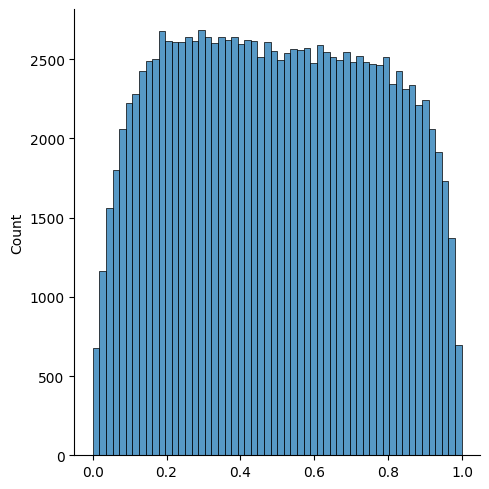

In [117]:
pred_test = np.mean(pred_tests, 0)
df_test['pred'] = pred_test

_ = sns.displot(pred_test)

In [118]:
pred_test

array([0.37765366, 0.20603258, 0.08028305, ..., 0.59555507, 0.54592333,
       0.449519  ])

In [119]:
a = pred_test>0.5

In [120]:

a= (pred_test > 0.5).astype(int)

In [121]:
a

array([0, 0, 0, ..., 1, 1, 0])

In [125]:
a[2]

0

In [126]:
pred_test[2]

0.08028305366703245

Se evidencia que si existe una probabilidad baja, debe perder

In [123]:
final_sub = df_test[['ID', 'pred']].copy()
final_sub.to_csv('submission.csv', index=False)

In [124]:
final_sub.head()

,ID,pred
0,2023_1101_1102,0.377654
1,2023_1101_1103,0.206033
2,2023_1101_1104,0.080283
3,2023_1101_1105,0.475150
4,2023_1101_1106,0.705072


XGBOOST

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb

In [127]:
def kfold2(dftor, df_test_=None, plot=False, verbose=0, mode="a"):
    seasons = dftor['Season'].unique()
    cvs = []
    cvs2 =[]
    pred_tests = []
    target = "ScoreDiff" if mode == "reg" else "WinA"

    for season in seasons[1:]:
        if verbose:
            print(f'\nValidating on season {season}')

        df_train = dftor[dftor['Season'] < season].reset_index(drop=True).copy()
        df_val = dftor[dftor['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()

        df_train, df_val, df_test = minmax(caracteristica, df_train, df_val, df_test)

        if mode == "reg":
            model = ElasticNet(alpha=1, l1_ratio=0.5)

        else:
            model = model = XGBClassifier()

        model.fit(df_train[caracteristica], df_train[target])

        if mode == "reg":
            pred = model.predict(df_val[caracteristica])
        else:
            pred = model.predict_proba(df_val[caracteristica])[:, 1]

        if df_test is not None:
            if mode == "reg":
                pred_test = model.predict(df_test[caracteristica])


                pred_test = (pred_test - pred_test.min()) / (pred_test.max() - pred_test.min())
            else:
                pred_test = model.predict_proba(df_test[caracteristica])[:, 1]

            pred_tests.append(pred_test)

        if plot:
            plt.figure(figsize=(15, 6))
            plt.subplot(1, 2, 1)
            plt.scatter(pred, df_val['ScoreDiff'].values, s=5)
            plt.title('Prediction vs Score Diff')
            plt.grid(True)
            plt.subplot(1, 2, 2)
            sns.histplot(pred, bins=20)
            plt.title('Predictions probability repartition')
            plt.show()

        pred = (pred - pred.min()) / (pred.max() - pred.min())
        pred = np.clip(pred, 0, 1)

        MSE = (((df_val['WinA'].values - pred))**2).mean()
        MAE =np.abs(((df_val['WinA'].values - pred))).mean()
        cvs.append(MSE)
        cvs2.append(MAE)



        if verbose:
            print(f'\t -> MSE {MSE:.3f}')
            #print(f'\t -> MAE {MAE:.3f}')



    print(f'\n Local MSE is {np.mean(cvs):.3f}')
   # print(f'\n Local MAE is {np.mean(cvs2):.3f}')


    return pred_tests

In [128]:
pred_tests2 = kfold2(dftor, df_test, plot=False, verbose=1, mode="XGBoost")


Validating on season 2000
	 -> MSE 0.264

Validating on season 2001
	 -> MSE 0.258

Validating on season 2002
	 -> MSE 0.322

Validating on season 2003
	 -> MSE 0.257

Validating on season 2004
	 -> MSE 0.256

Validating on season 2005
	 -> MSE 0.198

Validating on season 2006
	 -> MSE 0.189

Validating on season 2007
	 -> MSE 0.237

Validating on season 2008
	 -> MSE 0.219

Validating on season 2009
	 -> MSE 0.252

Validating on season 2010
	 -> MSE 0.246

Validating on season 2011
	 -> MSE 0.233

Validating on season 2012
	 -> MSE 0.236

Validating on season 2013
	 -> MSE 0.262

Validating on season 2014
	 -> MSE 0.204

Validating on season 2015
	 -> MSE 0.210

Validating on season 2016
	 -> MSE 0.211

Validating on season 2017
	 -> MSE 0.229

Validating on season 2018
	 -> MSE 0.270

Validating on season 2019
	 -> MSE 0.229

Validating on season 2021
	 -> MSE 0.260

Validating on season 2022
	 -> MSE 0.264

 Local MSE is 0.241


In [130]:
final_sub = df_test[['ID', 'pred']].copy()
final_sub.to_csv('submission.csv', index=False)

In [131]:
final_sub.head()

,ID,pred
0,2023_1101_1102,0.424710
1,2023_1101_1103,0.427227
2,2023_1101_1104,0.044811
3,2023_1101_1105,0.719603
4,2023_1101_1106,0.577381
